In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [14]:
'''
Title: Bike Details Dataset
Source:The dataset is available on Kaggle, simulating data commonly observed in real-world online bike resale platforms.

Description:
The dataset comprises 1061 records of used bike listings. These records include details about the bike's brand and model, selling price, kilometers driven, ownership history, and other attributes. It is particularly useful for resale value prediction, market analysis, and understanding buyer preferences.
The dataset consists of 7 features, combining both numeric and categorical data, offering a comprehensive view of the second-hand bike market.

Title: Bike Details Dataset
name: Brand and model name of the bike (Categorical, e.g., "Royal Enfield Classic 350", "Honda Dio").
selling_price: Listed selling price in INR (Numeric, e.g., 175000, 45000).
year: Manufacturing year of the bike (Numeric, e.g., 2019, 2015).
seller_type: Seller category, either "Individual" or "Dealer" (Categorical).
owner: Ownership history, e.g., "Ist owner", "2nd owner" (Categorical).
km_driven: Total kilometers driven (Numeric, in km, e.g., 12000, 23000).
ex_showroom_price: Original showroom price in INR (Numeric, e.g., 148114.0, 89643.0, etc.).
'''

'\nTitle: Bike Details Dataset\nSource:The dataset is available on Kaggle, simulating data commonly observed in real-world online bike resale platforms.\n\nDescription:\nThe dataset comprises 1061 records of used bike listings. These records include details about the bike\'s brand and model, selling price, kilometers driven, ownership history, and other attributes. It is particularly useful for resale value prediction, market analysis, and understanding buyer preferences.\nThe dataset consists of 7 features, combining both numeric and categorical data, offering a comprehensive view of the second-hand bike market.\n\nTitle: Bike Details Dataset\nname: Brand and model name of the bike (Categorical, e.g., "Royal Enfield Classic 350", "Honda Dio").\nselling_price: Listed selling price in INR (Numeric, e.g., 175000, 45000).\nyear: Manufacturing year of the bike (Numeric, e.g., 2019, 2015).\nseller_type: Seller category, either "Individual" or "Dealer" (Categorical).\nowner: Ownership histor

In [57]:
csv_url = "https://drive.google.com/uc?id=1iKy23bMtEQShF_weneRNnYrFmzvpPOI3"
df = pd.read_csv(csv_url)

In [10]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [11]:
df.dtypes

name                  object
selling_price          int64
year                   int64
seller_type           object
owner                 object
km_driven              int64
ex_showroom_price    float64
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [33]:
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [13]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [17]:
# 1.What is the range of selling prices in the dataset?
selling_price=list(df['selling_price'].unique())
max_selling_price=max(selling_price)
min_selling_price=min(selling_price)
range_of_selling_price=max_selling_price-min_selling_price
print(f"maximum selling price is {max_selling_price}")
print(f"minimum selling price is {min_selling_price}")
print(f"Range of selling price is {range_of_selling_price}")
# output:
# maximum selling price is 760000
# minimum selling price is 5000
# Range of selling price is 755000

maximum selling price is 760000
minimum selling price is 5000
Range of selling price is 755000


In [19]:
# 2.What is the median selling price for bikes in the dataset?
median_of_selling_price=float(df['selling_price'].median())
print(f"The median selling price for bike is {median_of_selling_price}")
# output:
# The median selling price for bike is 45000.0

The median selling price for bike is 45000.0


In [36]:
# 3.What is the most common seller type?
df['seller_type'].unique() 
# array(['Individual', 'Dealer'], dtype=object)
df1=pd.DataFrame(df['seller_type'].value_counts())
df1
# seller_type
# Individual    1055
# Dealer           6
print(f"The the most common seller type is {df1.head(1)}")
# The the most common seller type is  
# seller_type   count    
# Individual    1055

The the most common seller type is              count
seller_type       
Individual    1055


In [37]:
# 4. How many bikes have driven more than 50,000 kilometers?
high_km_bikes = df[df['km_driven'] > 50000]
count_high_km_bikes = high_km_bikes.shape[0]
print(f"Number of bikes driven more than 50,000 kilometers: {count_high_km_bikes}")
# output:
# Number of bikes driven more than 50,000 kilometers: 170

Number of bikes driven more than 50,000 kilometers: 170


In [38]:
# 5.What is the average km_driven value for each ownership type?
average_km_by_owner = df.groupby('owner')['km_driven'].mean()
print("Average km_driven for each ownership type:")
print(average_km_by_owner)
# output:
# Average km_driven for each ownership type:
# owner
# 1st owner     32816.583333
# 2nd owner     39288.991870
# 3rd owner     33292.181818
# 4th owner    311500.000000
# Name: km_driven, dtype: float64

Average km_driven for each ownership type:
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [39]:
# 6. What proportion of bikes are from the year 2015 or older?
bikes_2015_or_older = df[df['year'] <= 2015]
proportion_2015_or_older = len(bikes_2015_or_older) / len(df)
print(f"Proportion of bikes from 2015 or older: {proportion_2015_or_older:.2%}")
# output:
# Proportion of bikes from 2015 or older: 56.64%

Proportion of bikes from 2015 or older: 56.64%


In [40]:
# 7.What is the trend of missing values across the dataset?

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_trend = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})
missing_trend = missing_trend.sort_values(by='Missing Values', ascending=False)

print("Trend of Missing Values Across the Dataset:")
print(missing_trend)

# output:
# Trend of Missing Values Across the Dataset:
#                    Missing Values  Percentage (%)
# ex_showroom_price             435       40.999057
# name                            0        0.000000
# selling_price                   0        0.000000
# year                            0        0.000000
# seller_type                     0        0.000000
# owner                           0        0.000000
# km_driven                       0        0.000000


Trend of Missing Values Across the Dataset:
                   Missing Values  Percentage (%)
ex_showroom_price             435       40.999057
name                            0        0.000000
selling_price                   0        0.000000
year                            0        0.000000
seller_type                     0        0.000000
owner                           0        0.000000
km_driven                       0        0.000000


In [41]:
# 8. What is the highest ex_showroom_price recorded, and for which bike?

max_ex_showroom_price_row = df[df['ex_showroom_price'] == df['ex_showroom_price'].max()]
highest_price = max_ex_showroom_price_row['ex_showroom_price'].values[0]
bike_name = max_ex_showroom_price_row['name'].values[0]
print(f"Highest ex_showroom_price: {highest_price}")
print(f"Bike with the highest ex_showroom_price: {bike_name}")

# output:
# Highest ex_showroom_price: 1278000.0
# Bike with the highest ex_showroom_price: Harley-Davidson Street Bob


Highest ex_showroom_price: 1278000.0
Bike with the highest ex_showroom_price: Harley-Davidson Street Bob


In [42]:
# 9. What is the total number of bikes listed by each seller type?

bikes_by_seller_type = df['seller_type'].value_counts()
print("Total number of bikes listed by each seller type:")
print(bikes_by_seller_type)

# output:
# Total number of bikes listed by each seller type:
# seller_type
# Individual    1055
# Dealer           6
# Name: count, dtype: int64

Total number of bikes listed by each seller type:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


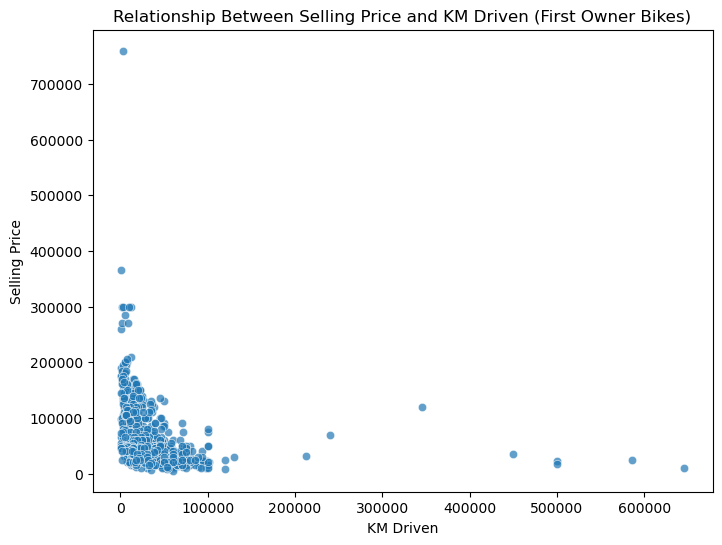

Correlation between selling_price and km_driven for first-owner bikes: -0.24


In [46]:
# 10.What is the relationship between selling_price and km_driven for first-owner bikes?

import matplotlib.pyplot as plt
import seaborn as sns
first_owner_bikes = df[df['owner'] == '1st owner']

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=first_owner_bikes,
    x='km_driven',
    y='selling_price',
    alpha=0.7
)
plt.title('Relationship Between Selling Price and KM Driven (First Owner Bikes)')
plt.xlabel('KM Driven')
plt.ylabel('Selling Price')
plt.show()

correlation = first_owner_bikes['selling_price'].corr(first_owner_bikes['km_driven'])
print(f"Correlation between selling_price and km_driven for first-owner bikes: {correlation:.2f}")


In [47]:
# 11.Identify and remove outliers in the km_driven column using the IQR method.

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['km_driven'] < lower_bound) | (df['km_driven'] > upper_bound)]
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

print(f"Number of outliers detected: {len(outliers)}")
print(f"Number of rows after removing outliers: {len(df_no_outliers)}")

# output:
# Number of outliers detected: 39
# Number of rows after removing outliers: 1022


Number of outliers detected: 39
Number of rows after removing outliers: 1022


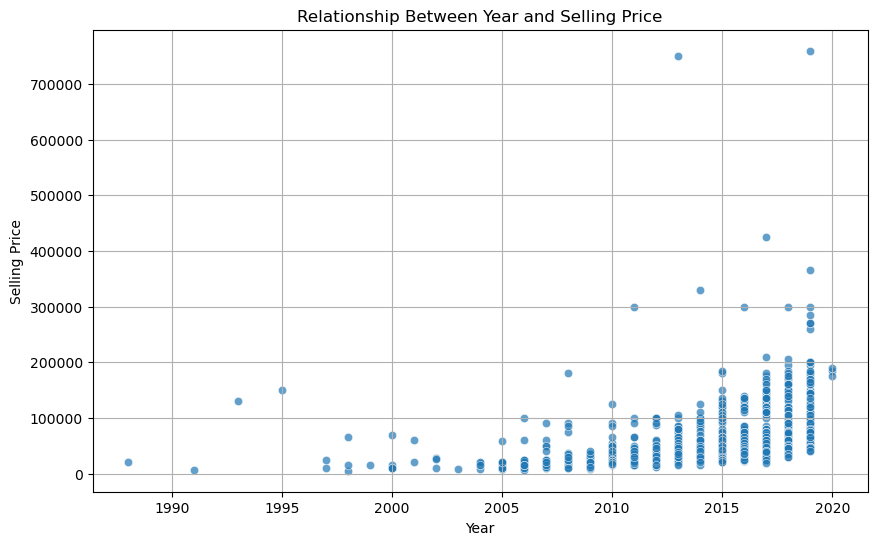

In [48]:
# 12.Perform a bivariate analysis to visualize the relationship between year and selling_price.

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='year', y='selling_price', alpha=0.7)
plt.title('Relationship Between Year and Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()


In [50]:
#13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?

import pandas as pd
current_year = 2024
df['age'] = current_year - df['year']

# Handle missing ex_showroom_price by filling with selling_price if necessary
df['ex_showroom_price'] = df['ex_showroom_price'].fillna(df['selling_price'])

# Calculate the depreciation (difference between original price and selling price)
df['depreciation'] = df['ex_showroom_price'] - df['selling_price']

# Calculate the average depreciation
average_depreciation = df['depreciation'].mean()
print("Average Depreciation in Selling Price:", average_depreciation)

# output:
# Average Depreciation in Selling Price: 16823.262959472195

Average Depreciation in Selling Price: 16823.262959472195


In [58]:
# 14.Which bike names are priced significantly above the average price for their manufacturing year?

import pandas as pd

# Assuming your dataframe is named 'df'
# Calculate the average selling price for each manufacturing year
avg_price_by_year = df.groupby('year')['selling_price'].mean().reset_index()

# Rename the column for clarity
avg_price_by_year.rename(columns={'selling_price': 'selling_price_avg'}, inplace=True)

# Merge the average prices back into the original dataframe
df = pd.merge(df, avg_price_by_year, on='year', how='left')

# Define the threshold multiplier for "significantly above" (e.g., 20%)
threshold_multiplier = 1.2

# Identify bikes priced significantly above the average for their year
df['is_significantly_above_avg'] = df['selling_price'] > (df['selling_price_avg'] * threshold_multiplier)

# Filter the dataset to get the names of bikes priced significantly above average
bikes_above_avg = df[df['is_significantly_above_avg']][['name', 'year', 'selling_price', 'selling_price_avg']]
print("Bikes priced significantly above the average price for their manufacturing year:")
print(bikes_above_avg)


Bikes priced significantly above the average price for their manufacturing year:
                                      name  year  selling_price  \
0                Royal Enfield Classic 350  2019         175000   
2      Royal Enfield Classic Gunmetal Grey  2018         150000   
7     Royal Enfield Bullet 350 [2007-2011]  2008         180000   
13                           Yamaha YZF R3  2019         365000   
17                        Yamaha YZF R15 S  2010          40000   
...                                    ...   ...            ...   
984              Royal Enfield Classic 500  2014          95000   
985              Royal Enfield Classic 500  2011          90000   
1005                    TVS Apache RTR 160  2014          60000   
1008                    Bajaj Pulsar 220 F  2012          52000   
1023                Bajaj Avenger 220 dtsi  2012          45000   

      selling_price_avg  
0         119689.511628  
2          87660.374046  
7          34289.285714  
13        

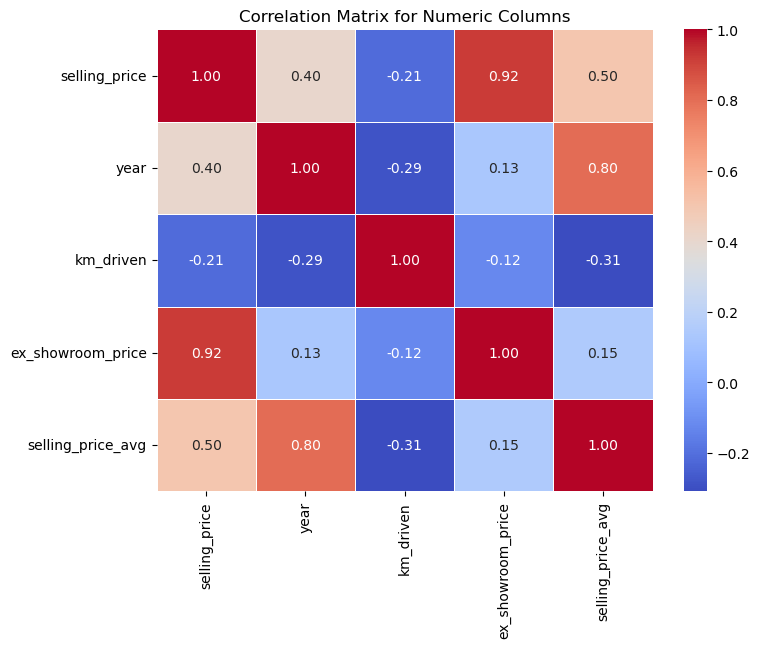

In [60]:
# 15.Develop a correlation matrix for numeric columns and visualize it using a heatmap.
import seaborn as sns
import matplotlib.pyplot as plt
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Numeric Columns')
plt.show()
